https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# 0 import data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
path_to_test_data="/home/user/Documents/studies/master/vu - systeembio master/modules/04 Machine Learning/project/project output data/"

# start data raw features and target
sd = {}
sd["rf"] = pd.read_csv(path_to_test_data+"x_train.csv")
sd["rt"] = pd.read_csv(path_to_test_data+"y_train.csv")
sd["features"] = sd["rf"].columns.to_list()

In [3]:
sd["rf"].shape

(64891, 233)

In [4]:
sd["rf"].describe

<bound method NDFrame.describe of        year  duration  published_year  published_month  published_day  \
0      1981       103            1981                9              3   
1      1994        81            1994                9             20   
2      2019       117            2019                6             18   
3      2012        86            2014                1             15   
4      1993       101            1993               12             21   
...     ...       ...             ...              ...            ...   
64886  2002       168            2002               10             10   
64887  1980        95            1980               12             15   
64888  2012       115            2012                4             13   
64889  1977       135            1977                8              6   
64890  2012        86            2012                8              3   

       genre_Sport  genre_Reality-TV  genre_Comedy  genre_Musical  \
0                0  

# 1 split data in train and validation set

In [5]:
# split data and train features and test labels and test labels and test fearures
spld = {}
spld["trf"], spld["tef"], spld["trl"], spld["tel"] = train_test_split(sd["rf"], sd["rt"], test_size = 0.25, random_state = 42)

In [6]:
print('Training Features Shape:', spld["trf"].shape)
print('Training Labels Shape:', spld["trl"].shape)
print('Testing Features Shape:', spld["tef"].shape)
print('Testing Labels Shape:', spld["tel"].shape)

Training Features Shape: (48668, 233)
Training Labels Shape: (48668, 1)
Testing Features Shape: (16223, 233)
Testing Labels Shape: (16223, 1)


# 2 establish baseline

In [7]:
# kunnen we nioet doen

# # The baseline predictions are the historical averages
# baseline_preds
# # Baseline errors, and display average baseline error
# baseline_errors = abs(baseline_preds - test_labels)
# print('Average baseline error: ', round(np.mean(baseline_errors), 2))

# 3 train model

In [8]:
from sklearn.ensemble import RandomForestRegressor

n_estimators must be set to 1000<br>
n_jobs musst be set on amount of threads that are free to use on your cpu.

In [9]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs=6)
# Train the model on training data
rf.fit(spld["trf"], spld["trl"]["avg_vote"].to_list())

RandomForestRegressor(n_jobs=6, random_state=42)

1 thread<br>
1000 trees: 23 min<br>
100 trees: <2 min<br>
<br>
6 thread<br>
1000 trees:<br>
100 trees: 30 sec

# 4 Make predictions on test set

In [10]:
# Use the forest's predict method on the test data
predictions = rf.predict(spld["tef"])
# Calculate the absolute errors
errors = abs(predictions - spld["tel"]["avg_vote"].to_list())
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.39 degrees.


# 5 Determine preformance metrics 

In [11]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / spld["tel"]["avg_vote"].to_list())
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.05 %.


# 6 Improve Model if Necessary

not done for now

# 7 Interpret Model and Report Results

## 7.1 Visualizing a Single Decision Tree

werkt niet omdat pydot deze versie van python niet ondersteund.

In [12]:
# # Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot

# # Pull out one tree from the forest
# tree = rf.estimators_[5]

# # Pull out one tree from the forest
# tree = rf.estimators_[5]
# # Export the image to a dot file
# export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# # Use dot file to create a graph
# (graph, ) = pydot.graph_from_dot_file('tree.dot')
# # Write graph to a png file
# graph.write_png('tree.png')

## 7.2 Variable Importances

In [13]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(sd["features"], importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: actors_F             Importance: 0.56
Variable: actors_C             Importance: 0.13
Variable: actors_D             Importance: 0.06
Variable: actors_E             Importance: 0.04
Variable: duration             Importance: 0.03
Variable: year                 Importance: 0.02
Variable: published_year       Importance: 0.02
Variable: published_month      Importance: 0.02
Variable: published_day        Importance: 0.02
Variable: country_USA          Importance: 0.01
Variable: actors_B             Importance: 0.01
Variable: genre_Sport          Importance: 0.0
Variable: genre_Reality-TV     Importance: 0.0
Variable: genre_Comedy         Importance: 0.0
Variable: genre_Musical        Importance: 0.0
Variable: genre_Film-Noir      Importance: 0.0
Variable: genre_Western        Importance: 0.0
Variable: genre_Fantasy        Importance: 0.0
Variable: genre_News           Importance: 0.0
Variable: genre_Biography      Importance: 0.0
Variable: genre_Adventure      Importance: 0.0
Va

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

Only these features have any importance.<br> 
<table>
    <tr>
        <th scope="col">variable</th>
        <th scope="col">importance</th>
    </tr>
    <tr><td>actors_F</td><td>0.56</td></tr>
    <tr><td>actors_C</td><td>0.13</td></tr>
    <tr><td>actors_D</td><td>0.06</td></tr>
    <tr><td>actors_E</td><td>0.04</td></tr>
    <tr><td>duration</td><td>0.03</td></tr>
    <tr><td>year</td><td>0.02</td></tr>
    <tr><td>published_year</td><td>0.02</td></tr>
    <tr><td>published_month</td><td>0.02</td></tr>
    <tr><td>published_day</td><td>0.02</td></tr>
    <tr><td>country_USA</td><td>0.01</td></tr>
    <tr><td>actors_B</td><td>0.01</td></tr>
</table>

## 7.2.1 again, but with fewer features

get features that can make a difference to begin with.

In [14]:
features_scores_df = pd.DataFrame(feature_importances)
features_scores_df2 = features_scores_df[features_scores_df[1] > 0].sort_values(1, ascending=False)
most_important_features = features_scores_df2[0].to_list()
most_important_features

['actors_F',
 'actors_C',
 'actors_D',
 'actors_E',
 'duration',
 'year',
 'published_year',
 'published_month',
 'published_day',
 'country_USA',
 'actors_B']

In [15]:
spld["trf"][most_important_features]

,actors_F,actors_C,actors_D,actors_E,duration,year,published_year,published_month,published_day,country_USA,actors_B
478,0,9,3,3,126,1974,1974,5,30,0,0
21764,5,0,1,5,75,2013,2013,3,25,1,0
31981,0,0,5,10,110,2014,2015,1,7,0,0
20072,12,0,1,2,96,2016,2018,12,14,1,0
40669,0,0,11,4,99,1956,1957,8,17,1,0
...,...,...,...,...,...,...,...,...,...,...,...
62570,1,0,3,5,83,1965,1965,8,6,1,0
38158,0,0,10,5,110,1998,1998,11,18,0,0
860,0,0,10,0,85,2001,2001,10,24,0,0
15795,1,0,4,10,104,1966,1966,8,27,0,0


In [16]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 100, random_state=42, n_jobs=6)

# Extract the most important features
# important_indices = [ sd["features"].index(feature) for feature in most_important_features ]
train_important = spld["trf"][most_important_features]
test_important = spld["tef"][most_important_features]

# Train the random forest
rf_most_important.fit(train_important, spld["trl"]["avg_vote"].to_list())

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - spld["tel"]["avg_vote"].to_list())

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / spld["tel"]["avg_vote"].to_list()))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.42 degrees.
Accuracy: 91.6 %.


We can probably take out more labels.<br>
we only take the actors, for the hell of it.<br>
The actor ranking is made up of with the actual movie score.<br>
So this basically would mean that you get a good prediction of the movie scores, if you use the morfed versions of the movie score.<br>
In other words:<br>
A) the most important features to predict the avg movie scores, are the actor scores that are derived from the avg movie score.<br>
B) We are technically not predicting anything.<br>

In [20]:
most_important_features_custom = ["actors_F", "actors_C", "actors_D", "actors_E"]

In [21]:
# New random forest with only the two most important variables
rf_most_important_custom = RandomForestRegressor(n_estimators= 100, random_state=42, n_jobs=6)

# Extract the most important features
# important_indices = [ sd["features"].index(feature) for feature in most_important_features ]
train_important = spld["trf"][most_important_features_custom]
test_important = spld["tef"][most_important_features_custom]

# Train the random forest
rf_most_important_custom.fit(train_important, spld["trl"]["avg_vote"].to_list())

# Make predictions and determine the error
predictions = rf_most_important_custom.predict(test_important)
errors = abs(predictions - spld["tel"]["avg_vote"].to_list())

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / spld["tel"]["avg_vote"].to_list()))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.43 degrees.
Accuracy: 91.3 %.


"actors_F" is probably the biggest group of actors, that is why it is so important...<br>
0.3 percent point difference => we are not predicting anything.

# 8 Visualisations

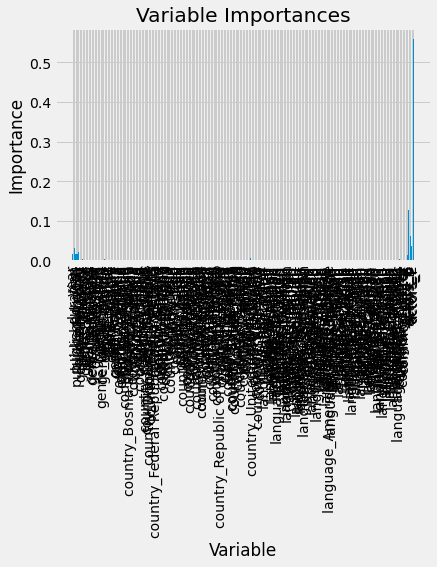

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, sd["features"], rotation='vertical')


# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

again,  our actor ratings are important and 
 'duration',
 'year',
 'published_year',
 'published_month',
 'published_day',
 'country_USA'<br><br>
 What is interesting though is that it matters a lot if the movie is from the USA.

lets look at our predictions vs the real label.<br>
note shure if we use the right variable.

In [27]:
predicted_test_scores = predictions.copy()
real_test_scores = spld["tel"]["avg_vote"].to_list()

we can do a paired sample t-test<br>
H0 = groups are equal.

In [29]:
import scipy.stats as stats

In [30]:
stats.ttest_rel(real_test_scores, predicted_test_scores)

Ttest_relResult(statistic=-1.058005103743805, pvalue=0.290068869748533)

p-value is pretty big, so no rejection of H0.<br>
So the groups are equal.<br>
in other words, is a good prediction.<br>
<br>
Side note: this is totally not the way to review performance, but my brain is a bit dead.